In [1]:
pip install scikit-learn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\hiran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hiran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


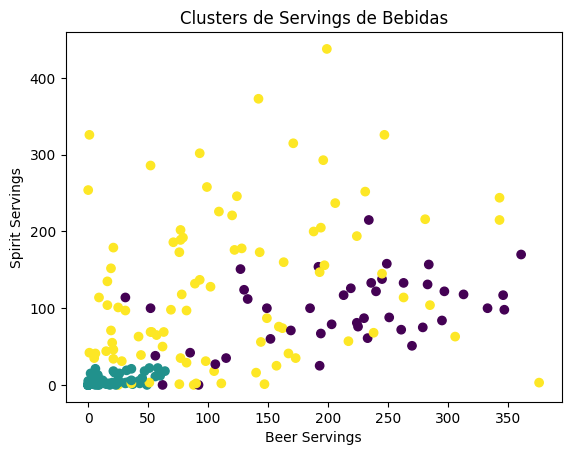

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Carregar os dados
data = pd.read_csv('drinks.csv')

# Selecionar as características relevantes para o modelo de mistura Gaussiana
X = data[['beer_servings', 'spirit_servings', 'wine_servings']]

# Remover quaisquer valores ausentes
X = X.dropna()

# Normalizar os dados (opcional, mas recomendado)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar o modelo de mistura Gaussiana
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_scaled)

# Prever os clusters
labels = gmm.predict(X_scaled)

# Adicionar os rótulos ao DataFrame original
data['cluster'] = labels

# Visualização dos clusters
plt.scatter(data['beer_servings'], data['spirit_servings'], c=labels, cmap='viridis')
plt.xlabel('Beer Servings')
plt.ylabel('Spirit Servings')
plt.title('Clusters de Servings de Bebidas')
plt.show()


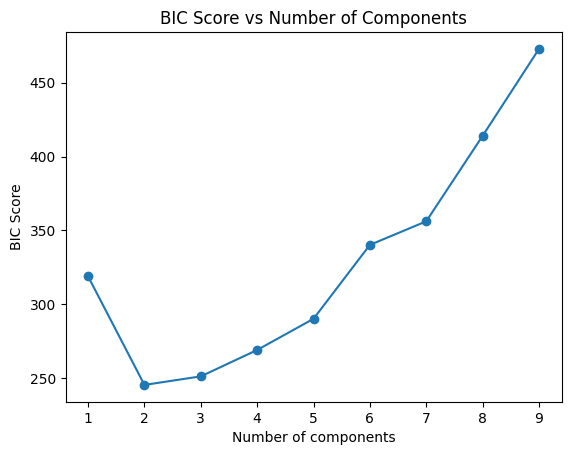

Optimal number of components: 2


In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

# Gerar dados de exemplo (caso necessário)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=0)

bic_scores = []
n_components_range = range(1, 10)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_train)
    bic_scores.append(gmm.bic(X_test))

plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Components')
plt.show()

# Selecionar o melhor número de componentes
optimal_n_components = n_components_range[np.argmin(bic_scores)]
print("Optimal number of components:", optimal_n_components)
